In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [39]:
customers = pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
customers.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [4]:
customers.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [40]:
del customers['PolicyNumber']
del customers['Year']
del customers['Make']
del customers['PolicyType']

In [41]:
def married(status):
    if status=='Married':
        return 1
    else:
        return 0
def single(status):
    if status=='Single':
        return 1
    else:
        return 0
def divorced(status):
    if status=='Divorced':
        return 1
    else:
        return 0
def widow(status):
    if status=='Widow':
        return 1
    else:
        return 0
customers['Married']=customers['MaritalStatus'].apply(married)
customers['Single']=customers['MaritalStatus'].apply(single)
customers['Divorced']=customers['MaritalStatus'].apply(divorced)
customers['Widow']=customers['MaritalStatus'].apply(widow)
del customers['MaritalStatus']

In [42]:
def collision(base):
    if base=='Collision':
        return 1
    else:
        return 0
def liability(base):
    if base=='Liability':
        return 1
    else:
        return 0
def perils(base):
    if base=='All Perils':
        return 1
    else:
        return 0    
customers['Collision']=customers['BasePolicy'].apply(collision)
customers['Liability']=customers['BasePolicy'].apply(liability)
customers['All Perils']=customers['BasePolicy'].apply(perils)
del customers['BasePolicy']

In [43]:
def convertStr(boolean):
    if boolean=='No':
        return 0
    elif boolean=='Yes':
        return 1
customers['PoliceReportFiled']=customers['PoliceReportFiled'].apply(convertStr)  
customers['WitnessPresent']=customers['WitnessPresent'].apply(convertStr) 

In [44]:
def convertAgent(agent):
    if agent=='External':
        return 1
    elif agent=='Internal':
        return 2
customers['AgentType']=customers['AgentType'].apply(convertAgent)     

In [45]:
def convertCar(car):
    if car=='1 vehicle':
        return 1
    elif car=='2 vehicles':
        return 2
    elif car=='3 to 4':
        return 3
    elif car=='5 to 8':
        return 4
    elif car=='more than 8':
        return 5
customers['NumberOfCars']=customers['NumberOfCars'].apply(convertCar)  

In [46]:
def convertAddressChange(address):
    if address=='no change':
        return 0
    elif address=='under 6 months':
        return 1
    elif address=='1 year':
        return 2
    elif address=='2 to 3 years':
        return 3
    elif address=='4 to 8 years':
        return 4
customers['AddressChange_Claim']=customers['AddressChange_Claim'].apply(convertAddressChange)      

In [47]:
def convertSuppliments(suppliment):
    if suppliment=='none':
        return 0
    elif suppliment=='1 to 2':
        return 1
    elif suppliment=='3 to 5':
        return 2
    elif suppliment=='more than 5':
        return 3
customers['NumberOfSuppliments']=customers['NumberOfSuppliments'].apply(convertSuppliments)      

In [48]:
def convertClaims(claim):
    if claim=='none':
        return 0
    elif claim==1:
        return 1
    elif claim=='2 to 4':
        return 2
    elif claim=='more than 4':
        return 3
customers['PastNumberOfClaims']=customers['PastNumberOfClaims'].apply(convertClaims)       

In [49]:
def convertDaysPolicy(number):
    if number=='none':
        return 0
    elif number=='1 to 7':
        return 1
    elif number=='8 to 15':
        return 2
    elif number=='15 to 30':
        return 3
    elif number=='more than 30':
        return 4
customers['Days_Policy_Accident']=customers['Days_Policy_Accident'].apply(convertDaysPolicy)   
customers['Days_Policy_Claim']=customers['Days_Policy_Claim'].apply(convertDaysPolicy)   

In [50]:
def convertFault(fault):
    if fault=='Policy Holder':
        return 0
    elif fault=='Third Party':
        return 1
customers['Fault']=customers['Fault'].apply(convertFault)       

In [51]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [18]:
display_all(customers.head())

,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,ClaimSize,Married,Single,Divorced,Widow,Collision,Liability,All Perils
0,Dec,5,Wednesday,Urban,Tuesday,Jan,1,Female,21.0,0,Sport,more than 69000,0,12,300,1.0,4,4,0,3 years,26 to 30,0,0,1,0,2,3,55526.069421,0,1,0,0,0,1,0
1,Jan,3,Wednesday,Urban,Monday,Jan,4,Male,34.0,0,Sport,more than 69000,0,15,400,4.0,4,4,0,6 years,31 to 35,1,0,1,0,0,1,59294.455571,0,1,0,0,1,0,0
2,Oct,5,Friday,Urban,Thursday,Nov,2,Male,47.0,0,Sport,more than 69000,0,7,400,3.0,4,4,1,7 years,41 to 50,0,0,1,0,0,1,71756.941320,1,0,0,0,1,0,0
3,Jun,2,Saturday,Rural,Friday,Jul,1,Male,65.0,1,Sport,20000 to 29000,0,4,400,2.0,4,4,1,more than 7,51 to 65,1,0,1,3,0,1,7584.153493,1,0,0,0,0,1,0
4,Feb,1,Saturday,Urban,Monday,Feb,3,Male,36.0,1,Sport,more than 69000,0,14,400,1.0,4,4,1,7 years,36 to 40,0,0,1,1,0,1,98545.374339,1,0,0,0,1,0,0


In [52]:
customers.drop(customers.index[[1146]],inplace=True)
X=customers[customers['DriverRating'].isnull()].index
customers.drop(customers.index[[X]],inplace=True)
X=customers[customers['Age'].isnull()].index
customers.drop(customers.index[[X]],inplace=True)

In [53]:
def sport(category):
    if category=='Sport':
        return 1
    else:
        return 0
def sedan(category):
    if category=='Sedan':
        return 1
    else:
        return 0
def utility(category):
    if category=='Utility':
        return 1
    else:
        return 0
customers['Sport']=customers['VehicleCategory'].apply(sport)
customers['Sedan']=customers['VehicleCategory'].apply(sedan)
customers['Utility']=customers['VehicleCategory'].apply(utility)
del customers['VehicleCategory']    

In [54]:
def convertAgeHolder(age):
    if age=='16 to 17':
        return 1
    elif age=='18 to 20':
        return 2
    elif age=='21 to 25':
        return 3
    elif age=='26 to 30':
        return 4
    elif age=='31 to 35':
        return 5
    elif age=='36 to 40':
        return 6
    elif age=='41 to 50':
        return 7
    elif age=='51 to 65':
        return 8
    elif age=='over 65':
        return 9
customers['AgeOfPolicyHolder']=customers['AgeOfPolicyHolder'].apply(convertAgeHolder)     

In [55]:
def convertAgeVehicle(age):
    if age=='new':
        return 1
    elif age=='2 years':
        return 2
    elif age=='3 years':
        return 3
    elif age=='4 years':
        return 4
    elif age=='5 years':
        return 5
    elif age=='6 years':
        return 6
    elif age=='7 years':
        return 7
    elif age=='more than 7':
        return 8
customers['AgeOfVehicle']=customers['AgeOfVehicle'].apply(convertAgeVehicle)        

In [56]:
def convertPrice(price):
    if price=='less than 20000':
        return 0
    elif price=='20000 to 29000':
        return 1
    elif price=='30000 to 39000':
        return 2
    elif price=='40000 to 59000':
        return 3
    elif price=='60000 to 69000':
        return 4
    elif price=='more than 69000':
        return 5
customers['VehiclePrice']=customers['VehiclePrice'].apply(convertPrice)    

In [57]:
def convertMonth(month):
    if month=='Jan':
        return 1
    elif month=='Feb':
        return 2
    elif month=='Mar':
        return 3
    elif month=='Apr':
        return 4
    elif month=='May':
        return 5
    elif month=='Jun':
        return 6
    elif month=='Jul':
        return 7
    elif month=='Aug':
        return 8
    elif month=='Sep':
        return 9
    elif month=='Oct':
        return 10
    elif month=='Nov':
        return 11
    elif month=='Dec':
        return 12
customers['Month']=customers['Month'].apply(convertMonth)
customers['MonthClaimed']=customers['MonthClaimed'].apply(convertMonth)    

In [58]:
def convertDay(day):
    if day=='Monday':
        return 1
    elif day=='Tuesday':
        return 2
    elif day=='Wednesday':
        return 3
    elif day=='Thursday':
        return 4
    elif day=='Friday':
        return 5
    elif day=='Saturday':
        return 6
    elif day=='Sunday':
        return 7
customers['DayOfWeek']=customers['DayOfWeek'].apply(convertDay)
customers['DayOfWeekClaimed']=customers['DayOfWeekClaimed'].apply(convertDay)    

In [59]:
def convertSex(sex):
    if sex=='Male':
        return 0
    elif sex=='Female':
        return 1
customers['Sex']=customers['Sex'].apply(convertSex)    

In [60]:
def convertArea(area):
    if area=='Urban':
        return 0
    elif area=='Rural':
        return 1
customers['AccidentArea']=customers['AccidentArea'].apply(convertArea)     

In [28]:
customers.dropna(inplace=True)
Fraud=customers[customers['FraudFound_P']==1]
NotFraud=customers[customers['FraudFound_P']==0]
Y_fraud=Fraud['FraudFound_P'].values
Y_NotFraud=NotFraud['FraudFound_P'].values
del Fraud['FraudFound_P']
del NotFraud["FraudFound_P"]
del customers['FraudFound_P']

In [29]:
X_train_fraud,X_test_fraud,Y_train_fraud,Y_test_fraud=train_test_split(Fraud.values,Y_fraud,test_size=0.5)
X_train_Notfraud,X_test_Notfraud,Y_train_Notfraud,Y_test_Notfraud=train_test_split(NotFraud.values,Y_NotFraud,test_size=0.80)

In [30]:
X_train=np.concatenate([X_train_fraud,X_train_Notfraud])
Y_train=np.concatenate([Y_train_fraud,Y_train_Notfraud])
X_test=np.concatenate([X_test_fraud,X_test_Notfraud])
Y_test=np.concatenate([Y_test_fraud,Y_test_Notfraud])

In [31]:
df_new=pd.DataFrame(X_train)
df_new.columns=customers.columns
df_new['FraudFound_P']=Y_train
df_new = df_new.sample(frac=1).reset_index(drop=True)
Y_train=df_new['FraudFound_P'].values
del df_new['FraudFound_P']
X_train=df_new.values

In [32]:
clf=RandomForestClassifier(n_estimators=40,max_features=0.5)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
Y_pred=clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_pred,Y_test))
print(f1_score(Y_test,Y_pred))

0.880684064847766
[[8796  229]
 [ 978  113]]
0.15771109560362873


In [33]:
Y_pred=clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_pred,Y_test))
print(f1_score(Y_test,Y_pred))

0.9401993355481728
[[8439  291]
 [ 249   51]]
0.15887850467289721


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Plotting according to Amount 
(sns.FacetGrid(df,hue="Class",size=7)
 .map(sns.distplot,"Time")
 .add_legend())

plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


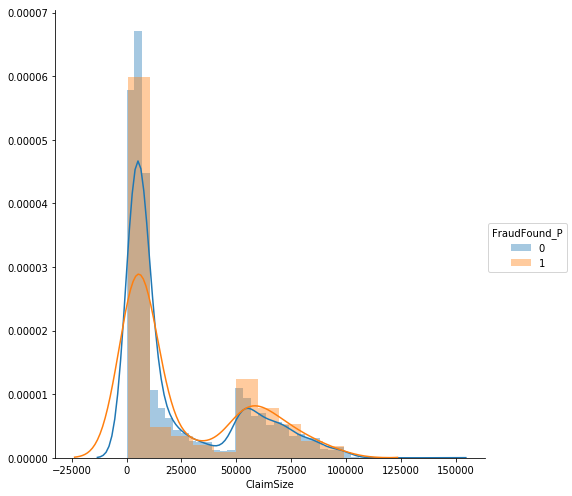

In [63]:
#Plotting according to ClaimSize 
(sns.FacetGrid(customers,hue="FraudFound_P",size=7)
 .map(sns.distplot,"ClaimSize")
 .add_legend())
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


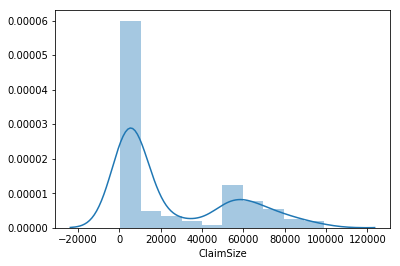

In [65]:
fraud=customers.loc[customers["FraudFound_P"]==1]
normal=customers.loc[customers["FraudFound_P"]==0]
sns.distplot(fraud.ClaimSize)
plt.show()

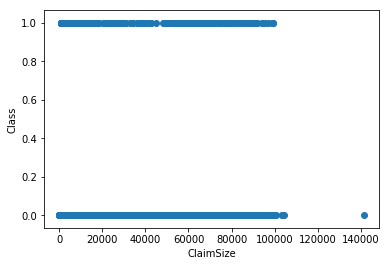

In [69]:
plt.scatter(customers['ClaimSize'],customers['FraudFound_P'])
plt.xlabel("ClaimSize")
plt.ylabel("Class")
plt.show()

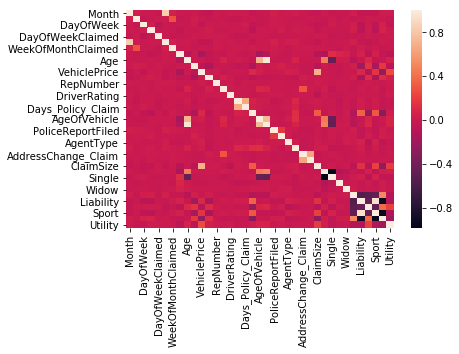

In [71]:
#Using Spearman Correlation Coefficient to see how much the features are co-related to each other
ax = sns.heatmap(customers.corr(method='spearman'))
plt.show()

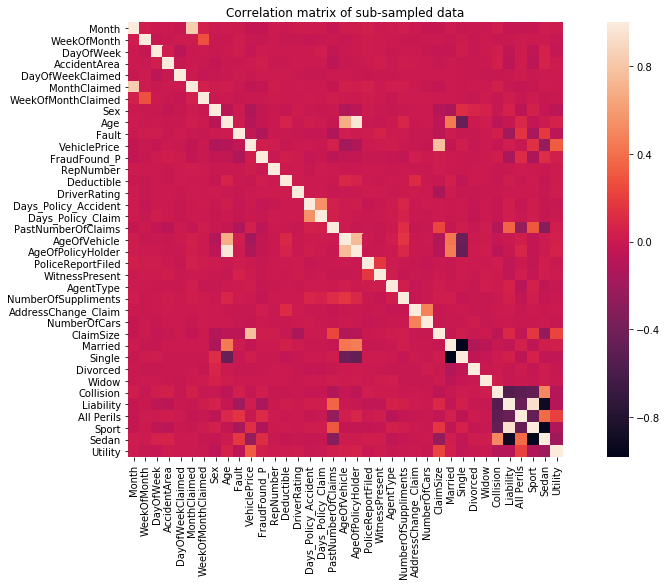

In [75]:
corrmat = customers.corr()
corrmat_orig = customers.corr()
f, ax = plt.subplots(figsize=(16, 8))
plt.title('Correlation matrix of sub-sampled data')
sns.heatmap(corrmat, vmax=1, square=True)


In [83]:
important_feats = customers.columns[np.abs(corrmat["FraudFound_P"]) > 0.1]
important_feats

Index(['Fault', 'FraudFound_P', 'Liability', 'All Perils', 'Sport', 'Sedan'], dtype='object')

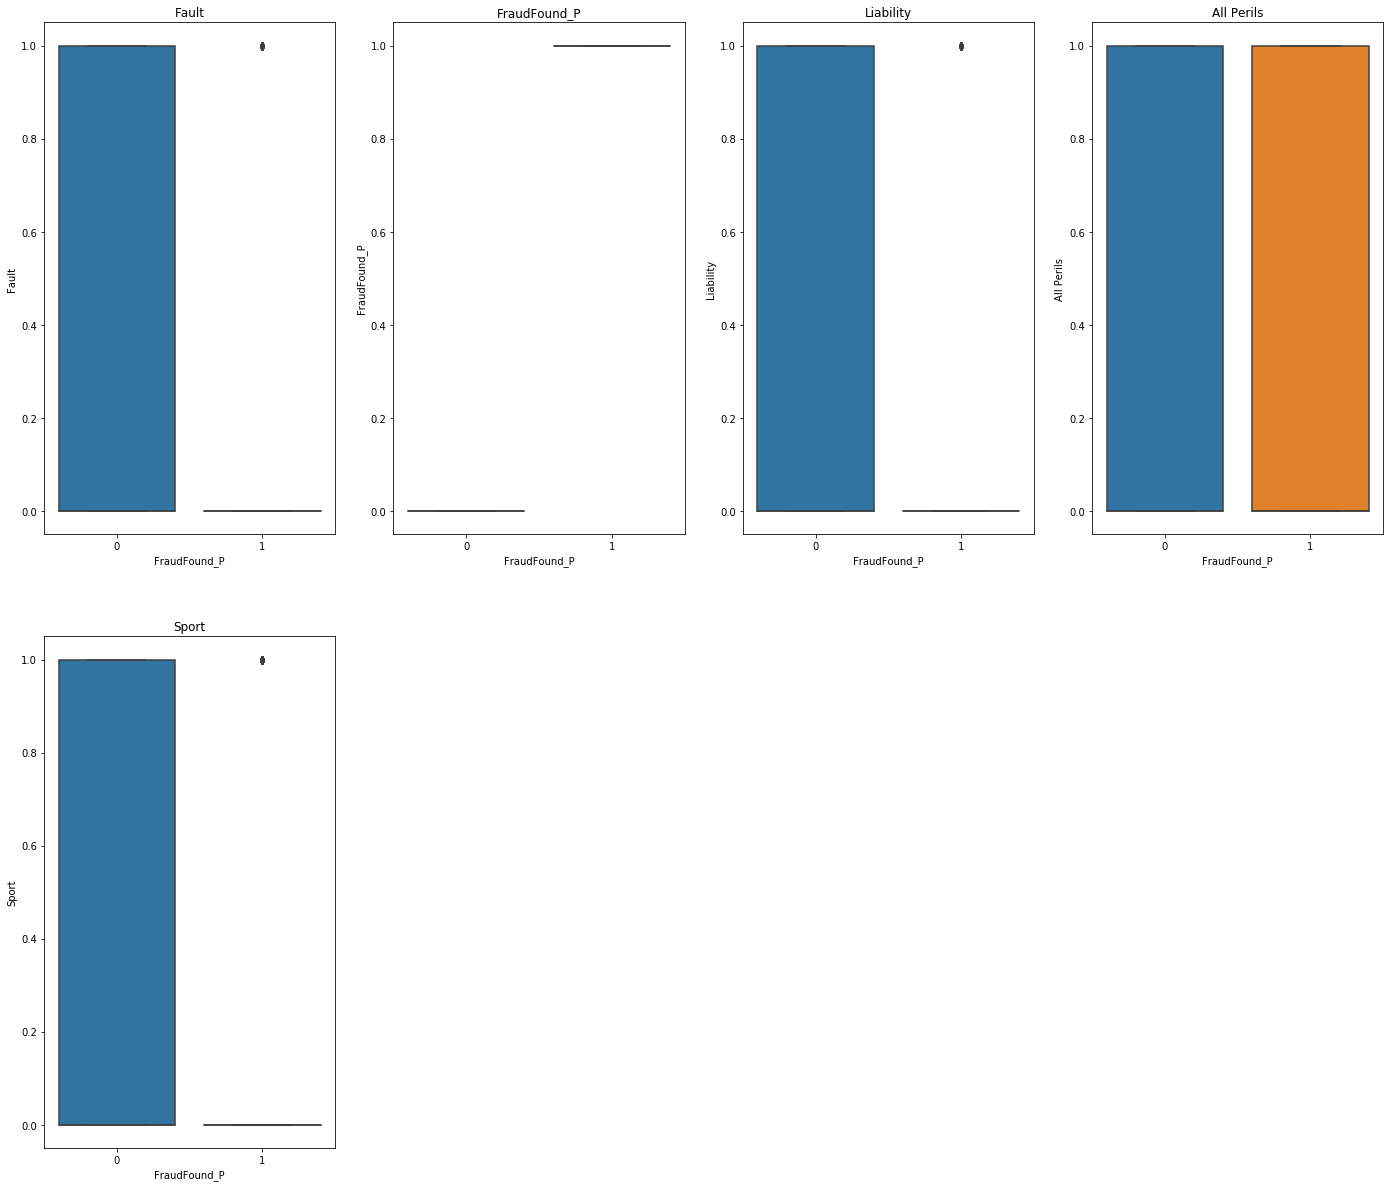

In [84]:
f, ax = plt.subplots(figsize=(24, 32))
for i in range(len(important_feats) - 1):
    plt.subplot(3, 4, i + 1)
    plt.title(important_feats[i])
    sns.boxplot(x='FraudFound_P', y=important_feats[i], data=customers)

(11543, 36) (11543, 1)
TSNE done in 562.000s.
(11543, 3)


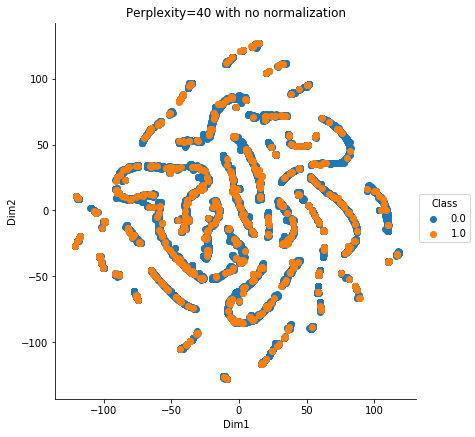

In [85]:
from sklearn.manifold import TSNE
from time import time


sample_features = customers
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=40,n_iter=2000)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=40 with no normalization")
plt.show()

(11543, 36) (11543, 1)
TSNE done in 278.839s.
(11543, 3)


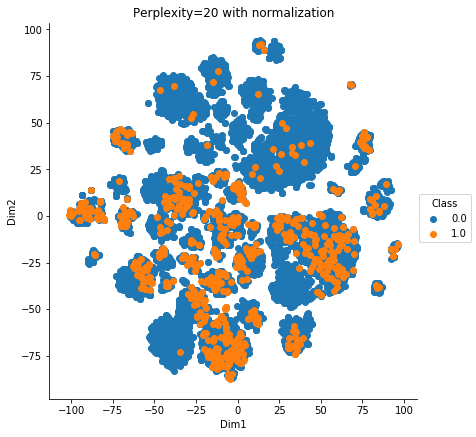

In [87]:
# Using Normalization on sample data
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = customers
# sample_features = df
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=20)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=20 with normalization")
plt.show()

(11543, 36) (11543, 1)
TSNE done in 352.318s.
(11543, 3)


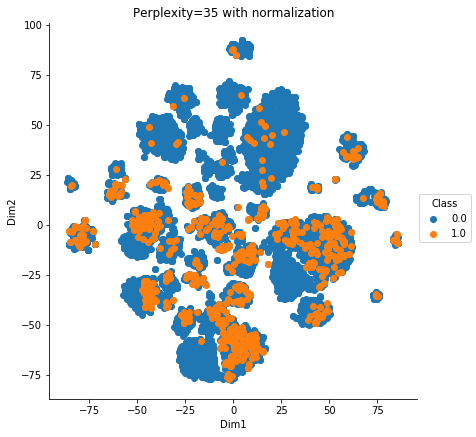

In [88]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = customers
# sample_features = df
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=35)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=35 with normalization")
plt.show()

(11543, 36) (11543, 1)
TSNE done in 396.648s.
(11543, 3)


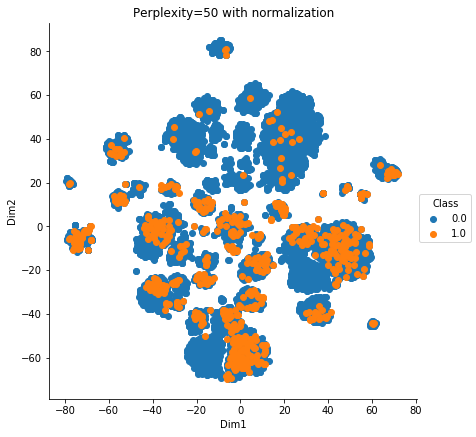

In [89]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = customers
# sample_features = df
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=50)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=50 with normalization")
plt.show()

(11543, 36) (11543, 1)
TSNE done in 1256.666s.
(11543, 3)


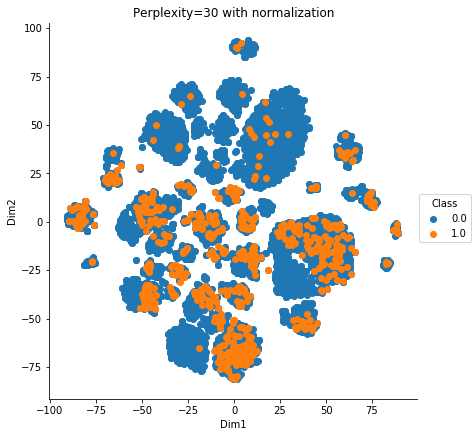

In [90]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = customers
# sample_features = df
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=30)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=30 with normalization")
plt.show()